## Exercise 05 : Boxplot

* use the data from the [file](https://drive.google.com/file/d/1B6M7Ku89ViIStXvWU6j7PyDnCTb0McEI/view?usp=sharing), read it to a dataframe and make any modification that
you may find useful to solve the task
* the figsize is still the same, you can choose whatever fontsize you like
* the color palette should be the same as in the example
* the fontsize of the title is 15
* the width of the box lines is 3, the width of the median lines is 2
* at the end of your Jupyter Notebook, create a markdown cell and insert the question:
“What was the IQR of the control group before the newsfeed?” In your answer, put
the approximate value that you can get just by looking at the graph, round it to
the nearest 10

In [17]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt 

con=sqlite3.connect("../data/ab-test.csv")
df=pd.read_csv("../data/ab-test.csv",sep=',' )
df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


In [40]:
df_after=df[df['time']=='after']
df_after=df_after.reset_index(drop=True).drop(['time', 'uid'], axis=1)
df_after_test=df_after[df_after['group']=='test'].drop('group', axis=1)['diff']
df_after_control=df_after[df_after['group']=='control'].drop('group', axis=1)['diff']

df_before=df[df['time']=='before'].reset_index(drop=True).drop(['time', 'uid'], axis=1)
df_before_test=df_before[df_before['group']=='test'].drop('group', axis=1)['diff']
df_before_control=df_before[df_before['group']=='control'].drop('group', axis=1)['diff']

In [59]:
box_style=dict(color='green', linewidth=3)
median_style = dict(color='red', linewidth=2 )
whisker_style = dict(color='red',linestyle='-')
cap_style = dict(color='red')
mean_style = dict(marker='^', markerfacecolor='green', markeredgecolor='green')

/tmp/ipykernel_425923/4176955717.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([df_after_test, df_after_control],
/tmp/ipykernel_425923/4176955717.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([df_before_test, df_before_control],


Text(0.5, 0.98, 'Lag before labs deadlines. After and before the Newsfeed')

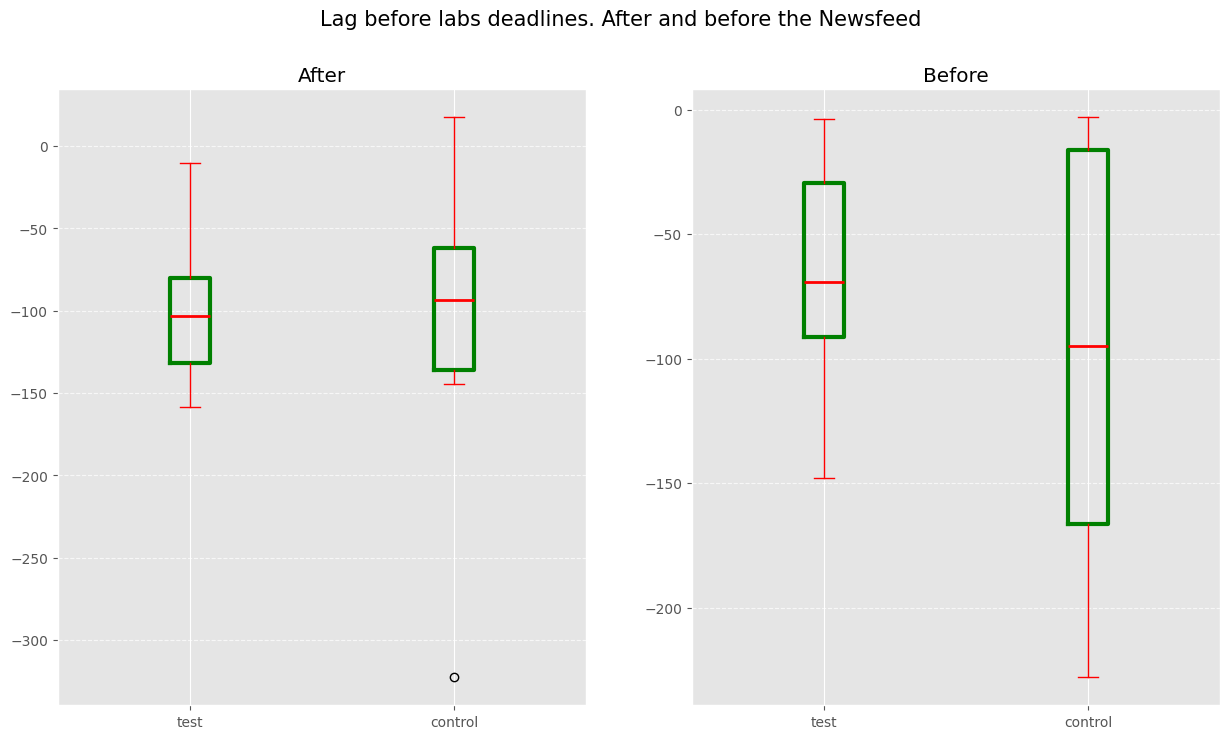

In [63]:
plt.style.use('ggplot')
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(15,8))
ax[0].boxplot([df_after_test, df_after_control], 
    labels=['test', 'control'],
     boxprops=box_style,
     whiskerprops=whisker_style,
     capprops=cap_style,
     medianprops=median_style,
     meanprops=mean_style
     )
ax[0].set_title('After')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].boxplot([df_before_test, df_before_control],
    labels=['test', 'control'],
     boxprops=box_style,
     whiskerprops=whisker_style,
     capprops=cap_style,
     medianprops=median_style,
     meanprops=mean_style
    )
ax[1].set_title('Before')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)

In [64]:
con.close()

“What was the IQR of the control group before the newsfeed?” In your answer, put
the approximate value that you can get just by looking at the graph, round it to
the nearest 10

## 150